<a href="https://colab.research.google.com/github/bruno-ritter/Regression-model-for-Brazilian-Economic-Index-IBC_BR-/blob/main/Modelo_Regress%C3%A3o_Linear_para_o_IBC_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

###Base de dados Banco Central

In [2]:
def base_bacen(codigo_bcb):
  url_bcb = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json'
  df = pd.read_json(url_bcb)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [3]:
#	Produção Industrial (2012=100) – Geral – Região Sudeste (Índice)
prod_industrial = base_bacen(21924)
prod_industrial = prod_industrial.rename(columns={'valor':'prod_industrial_sudeste (indice)'})
prod_industrial['variacao_prod_industrial_sudeste'] = prod_industrial['prod_industrial_sudeste (indice)'].diff()
prod_industrial['crescimento_prod_industrial_sudeste'] = (prod_industrial['prod_industrial_sudeste (indice)'] / prod_industrial['prod_industrial_sudeste (indice)'].iloc[0]) - 1
prod_industrial = prod_industrial.fillna(0)

In [4]:
# Consumo de derivados de petróleo - Óleo combustível (Barris/dia (mil))
consu_petroleo = base_bacen(1395)
consu_petroleo = consu_petroleo.rename(columns={'valor':'consumo_petroleo (barris/dia)'})
consu_petroleo['variacao_consumo_petroleo'] = consu_petroleo['consumo_petroleo (barris/dia)'].diff()
consu_petroleo['crescimento_consumo_petroleo'] = (consu_petroleo['consumo_petroleo (barris/dia)'] / consu_petroleo['consumo_petroleo (barris/dia)'].iloc[0]) - 1
consu_petroleo = consu_petroleo.fillna(0)

In [5]:
#	PIB trimestral - Dados observados - Produção e distribuição de eletricidade, gás e água (Índice)
pro_elet = base_bacen(22088)
pro_elet = pro_elet.rename(columns={'valor':'producao_eletrica (indice)'})
pro_elet['variacao_producao_eletrica'] = pro_elet['producao_eletrica (indice)'].diff()
pro_elet['crescimento_producao_eletrica'] = (pro_elet['producao_eletrica (indice)'] / pro_elet['producao_eletrica (indice)'].iloc[0]) - 1
pro_elet = pro_elet.fillna(0)

In [6]:
#Produção Total de Autoveículos
prod_auto = base_bacen(1373)
prod_auto = prod_auto.rename(columns={'valor':'producao_autoveiculos (uni)'})
prod_auto['variacao_producao_autoveiculos'] = prod_auto['producao_autoveiculos (uni)'].diff()
prod_auto['crescimento_producao_autoveiculos'] = (prod_auto['producao_autoveiculos (uni)'] / prod_auto['producao_autoveiculos (uni)'].iloc[0]) - 1
prod_auto = prod_auto.fillna(0)

In [7]:
#Vendas de veículos – Total
vendas_veiculos = base_bacen(7389)
vendas_veiculos = vendas_veiculos.rename(columns={'valor':'vendas_autoveiculos (uni)'})
vendas_veiculos['variacao_vendas_veiculos'] = vendas_veiculos['vendas_autoveiculos (uni)'].diff()
vendas_veiculos['crescimento_vendas_veiculos'] = (vendas_veiculos['vendas_autoveiculos (uni)'] / vendas_veiculos['vendas_autoveiculos (uni)'].iloc[0]) - 1
vendas_veiculos = vendas_veiculos.fillna(0)

In [8]:
#IBC-Br ajuste sazonal
ibc_ajuste_sazonal = base_bacen(24364)
ibc_ajuste_sazonal = ibc_ajuste_sazonal.rename(columns={'valor':'ibc_ajuste_sazonal'})
ibc_ajuste_sazonal['variacao_ibc_ajuste_sazonal'] = ibc_ajuste_sazonal['ibc_ajuste_sazonal'].diff()
ibc_ajuste_sazonal['crescimento_ibc_ajuste_sazonal'] = (ibc_ajuste_sazonal['ibc_ajuste_sazonal'] / ibc_ajuste_sazonal['ibc_ajuste_sazonal'].iloc[0]) - 1
ibc_ajuste_sazonal = ibc_ajuste_sazonal.fillna(0)

In [9]:
#Estoque de empregos formais
estoque_empr_formais = base_bacen(28763)
estoque_empr_formais = estoque_empr_formais.rename(columns={'valor':'estoque_empr_formais'})
estoque_empr_formais['variacao_estoque_empr_formais'] = estoque_empr_formais['estoque_empr_formais'].diff()
estoque_empr_formais['crescimento_estoque_empr_formais'] = (estoque_empr_formais['estoque_empr_formais'] / estoque_empr_formais['estoque_empr_formais'].iloc[0]) - 1
estoque_empr_formais = estoque_empr_formais.fillna(0)

In [10]:
#Índice de Produção Industrial
indice_prod_ind = base_bacen(21859)
indice_prod_ind = indice_prod_ind.rename(columns={'valor':'indice_prod_ind'})
indice_prod_ind['variacao_indice_prod_ind'] = indice_prod_ind['indice_prod_ind'].diff()
indice_prod_ind['crescimento_indice_prod_ind'] = (indice_prod_ind['indice_prod_ind'] / indice_prod_ind['indice_prod_ind'].iloc[0]) - 1
indice_prod_ind = indice_prod_ind.fillna(0)

In [11]:
#Consumo de energia Total
consumo_energia_total = base_bacen(1406)
consumo_energia_total = consumo_energia_total.rename(columns={'valor':'consumo_energia_total'})
consumo_energia_total['variacao_consumo_energia_total'] = consumo_energia_total['consumo_energia_total'].diff()
consumo_energia_total['crescimento_consumo_energia_total'] = (consumo_energia_total['consumo_energia_total'] / consumo_energia_total['consumo_energia_total'].iloc[0]) - 1
consumo_energia_total = consumo_energia_total.fillna(0)

In [12]:
#PMS – Volume total
pms = base_bacen(28473)
pms = pms.rename(columns={'valor':'pms'})
pms['variacao_pms'] = pms['pms'].diff()
pms['crescimento_pms'] = (pms['pms'] / pms['pms'].iloc[0]) - 1
pms = pms.fillna(0)

In [13]:
#Índice de condções econômicas
indice_cond_econ = base_bacen(4395)
indice_cond_econ = indice_cond_econ.rename(columns={'valor':'indice_cond_econ'})
indice_cond_econ['variacao_indice_cond_econ'] = indice_cond_econ['indice_cond_econ'].diff()
indice_cond_econ['crescimento_indice_cond_econ'] = (indice_cond_econ['indice_cond_econ'] / indice_cond_econ['indice_cond_econ'].iloc[0]) - 1
indice_cond_econ = indice_cond_econ.fillna(0)

In [14]:
#ISA-S dessazonalizado
isa_dessazonalizado = base_bacen(20340)
isa_dessazonalizado = isa_dessazonalizado.rename(columns={'valor':'isa_dessazonalizado'})
isa_dessazonalizado['variacao_isa_dessazonalizado'] = isa_dessazonalizado['isa_dessazonalizado'].diff()
isa_dessazonalizado['crescimento_isa_dessazonalizado'] = (isa_dessazonalizado['isa_dessazonalizado'] / isa_dessazonalizado['isa_dessazonalizado'].iloc[0]) - 1
isa_dessazonalizado = isa_dessazonalizado.fillna(0)

###Gráficos

In [15]:
import matplotlib.pyplot as plt

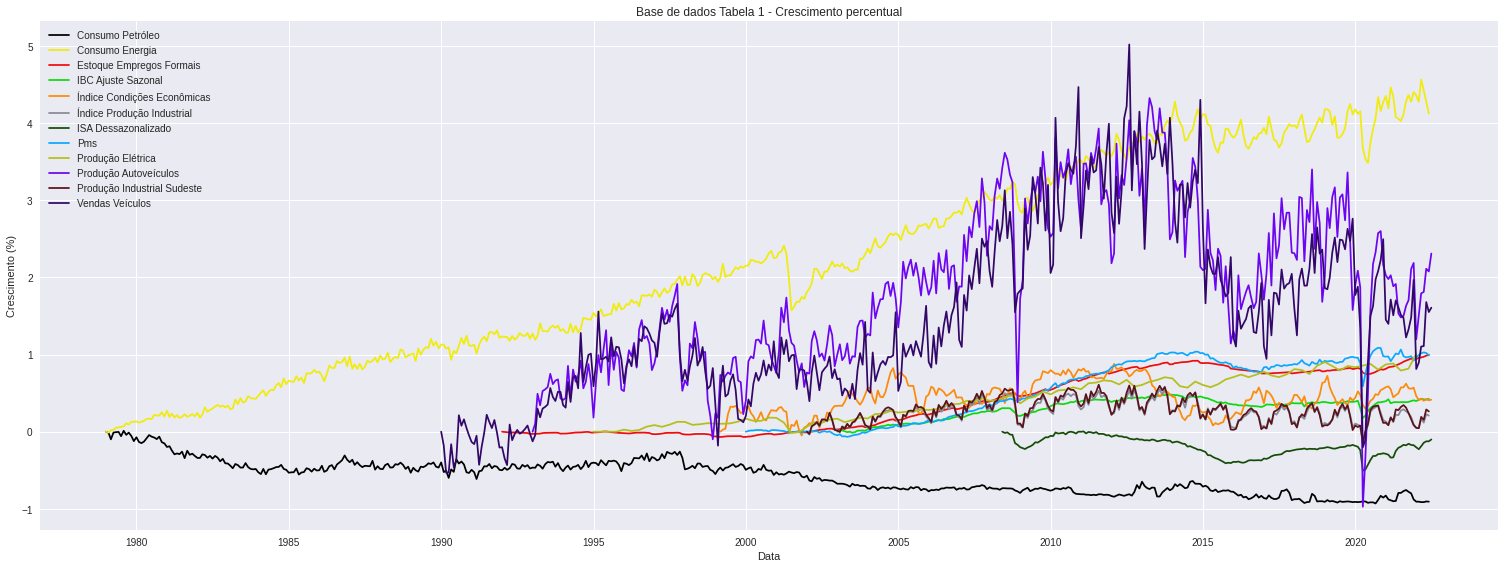

In [16]:
#Crescimento %
plt.style.use('seaborn')
plt.figure(figsize=(21, 8))
plt.title('Base de dados Tabela 1 - Crescimento percentual')

plt.plot(consu_petroleo.crescimento_consumo_petroleo, label= 'Consumo Petróleo', color = '#000000')
plt.plot(consumo_energia_total.crescimento_consumo_energia_total, label= 'Consumo Energia', color='#f0ec0c')
plt.plot(estoque_empr_formais.crescimento_estoque_empr_formais, label= 'Estoque Empregos Formais', color='#f00c0c')
plt.plot(ibc_ajuste_sazonal.crescimento_ibc_ajuste_sazonal, label='IBC Ajuste Sazonal', color='#0dd910')
plt.plot(indice_cond_econ.crescimento_indice_cond_econ, label='Índice Condições Econômicas', color='#fc8b0a')
plt.plot(indice_prod_ind.crescimento_indice_prod_ind, label='Índice Produção Industrial', color='#898a96')
plt.plot(isa_dessazonalizado.crescimento_isa_dessazonalizado, label='ISA Dessazonalizado', color='#154d08')
plt.plot(pms.crescimento_pms, label='Pms', color='#0aa9ff')
plt.plot(pro_elet.crescimento_producao_eletrica, label='Produção Elétrica', color='#b4bf19')
plt.plot(prod_auto.crescimento_producao_autoveiculos, label='Produção Autoveículos', color='#6c05f2')
plt.plot(prod_industrial.crescimento_prod_industrial_sudeste, label='Produção Industrial Sudeste', color='#59131b')
plt.plot(vendas_veiculos.crescimento_vendas_veiculos, label='Vendas Veículos', color='#320769')


plt.xlabel('Data')
plt.ylabel('Crescimento (%)')
plt.legend()
plt.tight_layout()

plt.show()

###Regressão linear simples IBC-BR

In [17]:
# Variável dependente (Y) -> IBC BR 2003-01-01 2022-05-01
# Variáveis independentes (X) -> venda de veículos, consumo de energia total, estoque de empregos formais, índice de condições econômicas e índice de produção industrial

# Criando o DataFrame com as variáveis para colocar todos na mesma data
df = pd.DataFrame().append([ibc_ajuste_sazonal['ibc_ajuste_sazonal'], vendas_veiculos['vendas_autoveiculos (uni)'], consumo_energia_total['consumo_energia_total'], estoque_empr_formais['estoque_empr_formais'], indice_cond_econ['indice_cond_econ'], indice_prod_ind['indice_prod_ind']], ignore_index=False).transpose()
# Retirando os valores nulos
df = df['2003-01-01':'2022-05-01']
# Normalizando dos dados com a variação percentual iniciando em 2003-01-01
df = (df / df.iloc[0]) - 1

,ibc_ajuste_sazonal,vendas_autoveiculos (uni),consumo_energia_total,estoque_empr_formais,indice_cond_econ,indice_prod_ind
data,,,,,,
2003-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-02-01,0.016836,0.005955,-0.007435,0.003885,0.002790,-0.029730
2003-03-01,0.016637,-0.124925,0.005129,0.004868,-0.000082,0.045946
2003-04-01,0.004881,-0.071335,-0.014512,0.011990,0.041106,0.033784
2003-05-01,-0.005778,-0.090776,-0.010456,0.018477,0.098375,0.077027
...,...,...,...,...,...,...
2022-01-01,0.397988,0.078978,0.692629,0.887973,0.096406,0.025676
2022-02-01,0.411735,0.128824,0.667303,0.903535,0.055546,0.025676
2022-03-01,0.426778,0.252325,0.758349,0.907751,0.070725,0.141892


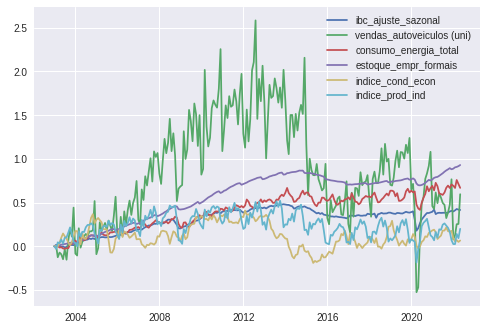

In [18]:
plt.plot(df)
plt.legend(('ibc_ajuste_sazonal', 'vendas_autoveiculos (uni)', 'consumo_energia_total', 'estoque_empr_formais', 'indice_cond_econ', 'indice_prod_ind'))

### Modelo de regressão linear simples entre duas variávels
Primeiro farei o modelo com duas variáveis.


In [48]:
from math import sqrt
#Data frame para a regressão
reg = pd.DataFrame().append([ibc_ajuste_sazonal['ibc_ajuste_sazonal'], estoque_empr_formais['estoque_empr_formais']], ignore_index=False).transpose()
reg = reg['2003-01-01':'2022-05-01']
y = reg['ibc_ajuste_sazonal']
x = reg['estoque_empr_formais']

#Devio padrão e variância
n_reg = len(reg)
media_y = sum(y) / n_reg
media_x = sum(x) / n_reg

var_y = sum((y - media_y) ** 2) / (n_reg - 1)
dp_y = sqrt(var_y)

var_y = sum((x - media_x) ** 2) / (n_reg - 1)
dp_x = sqrt(var_y)

#Correlação
cov = (sum((y - media_y) * (x - media_x))) / (n_reg - 1)
corr = cov / (dp_y * dp_x)

#Mostrar resultado
print(f'Desvio Padrão IBC = {dp_y}\nDesvio Padrão Empregos = {dp_x}\nCorrelação = {corr}')

Desvio Padrão IBC = 13.267291528715184
Desvio Padrão Empregos = 5875514.118990356
Correlação = 0.9507057473221866


In [43]:
#Regressão simples utilizando o índice IBC e o estoque de empregos formais
beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)

beta_0 = media_y - beta_1 * media_x

y_chapeu = beta_0 + (beta_1 * x)
#Soma dos quadrados explicado
sqe = sum((y_chapeu - media_y) ** 2) 
#Soma dos quadrados totais
sqt = sum((y - media_y) ** 2) 
#R²
r_2 = 1 - (sqe / sqt)
#Soma dos quadrados dos resíduos
sqr = sum((y - y_chapeu) ** 2) 

print(f'SQE = {round(sqe, 4)} \nSQT = {round(sqt, 4)} \nR² = {round(r_2, 4)} \nSQR = {round(sqr, 4)}')

SQE = 36910.0614 
SQT = 40836.8777 
R² = 0.0962 
SQR = 3926.8163


In [19]:
from numpy.ma.core import mean
#Regressão simples entre o a variação perentual do índice IBC e o estoque de empregos formais
reg_cresc = pd.DataFrame().append([df['ibc_ajuste_sazonal'], df['estoque_empr_formais']], ignore_index=False).transpose()

beta_1 = sum((reg_cresc['estoque_empr_formais'] - np.mean(reg_cresc['estoque_empr_formais'])) * (reg_cresc['ibc_ajuste_sazonal'] - np.mean(reg_cresc['ibc_ajuste_sazonal']))) / sum((reg_cresc['estoque_empr_formais'] - np.mean(reg_cresc['estoque_empr_formais'])) ** 2)

beta_0 = np.mean(reg_cresc['ibc_ajuste_sazonal']) - (beta_1 * np.mean(reg_cresc['estoque_empr_formais']))

y_chapeu = beta_0 + (beta_1 * df['estoque_empr_formais'])
#Soma dos quadrados explicado
sqe = sum((y_chapeu - np.mean(df['ibc_ajuste_sazonal'])) ** 2) 
#Soma dos quadrados totais
sqt = sum((df['ibc_ajuste_sazonal'] - np.mean(df['ibc_ajuste_sazonal'])) ** 2) 
#R²
r_2 = sqe / sqt
#Soma dos quadrados dos resíduos
sqr = sum((df['ibc_ajuste_sazonal'] - y_chapeu) ** 2) 

print(f'SQE = {round(sqe, 4)} \nSQT = {round(sqt, 4)} \nR² = {round(r_2, 4)} \nSQR = {round(sqr, 4)}')

SQE = 3.6631 
SQT = 4.0528 
R² = 0.9038 
SQR = 0.3897


In [25]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

Text(0.5, 0, 'Estoque empregos formais')

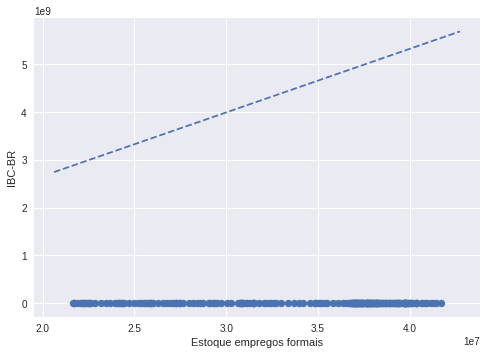

In [28]:
plt.scatter(reg['estoque_empr_formais'], reg['ibc_ajuste_sazonal'], s=50)

plt.ylabel('IBC-BR')
plt.xlabel('Estoque empregos formais')